In [79]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [80]:
CHANNEL_CONFIG = "g-a"

In [81]:
TRAIN_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_gold_annotation"

In [82]:
TEST_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_minx_annotation"

In [83]:
MOTION = "HIT"

# Build DataFrame

In [84]:
def build_df(_DIR):
    file_pattern = os.path.join(_DIR, "*.csv")
    csv_files = glob.glob(file_pattern)
    print(f"A total of {len(csv_files)} CSV files were used in constructing this DataFrame.")
    df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)
    return df

In [85]:
df_train = build_df(TRAIN_DIR)

A total of 16 CSV files were used in constructing this DataFrame.


In [86]:
df_test = build_df(TEST_DIR)

A total of 10 CSV files were used in constructing this DataFrame.


## Remove unneeded columns

In [87]:
match CHANNEL_CONFIG:
    case "gyro":
        df_train = df_train.filter(regex=r'^(gyro|motion)')
        df_test = df_test.filter(regex=r'^(gyro|motion)')
    case "accel":
        df_train = df_train.filter(regex=r'^(accel|motion)')
        df_test = df_test.filter(regex=r'^(accel|motion)')
    case "mag":
        df_train = df_train.filter(regex=r'^(mag|motion)')
        df_test = df_test.filter(regex=r'^(mag|motion)')
    case "ahrs":
        df_train = df_train.filter(regex=r'^(ahrs|motion)')
        df_test = df_test.filter(regex=r'^(ahrs|motion)')
    case "g-a":
        df_train = df_train.filter(regex=r'^(gyro|accel|motion)')
        df_test = df_test.filter(regex=r'^(gyro|accel|motion)')
    case "g-m":
        df_train = df_train.filter(regex=r'^(gyro|mag|motion)')
        df_test = df_test.filter(regex=r'^(gyro|mag|motion)')
    case "a-m":
        df_train = df_train.filter(regex=r'^(accel|mag|motion)')
        df_test = df_test.filter(regex=r'^(accel|mag|motion)')
    case "g-a-m":
        df_train = df_train.filter(regex=r'^(gyro|accel|mag|motion)')
        df_test = df_test.filter(regex=r'^(gyro|accel|mag|motion)')
    case _:
        pass

In [88]:
# df_train.drop(columns=df_train.filter(regex=r'^ahrs').columns, inplace=True)
# df_test.drop(columns=df_test.filter(regex=r'^ahrs').columns, inplace=True)

# Keep values equal to 'X', change everything else to 'Y'

In [89]:
# df_train['motion_type'] = df_train['motion_type'].where(df_train['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [90]:
# df_test['motion_type'] = df_test['motion_type'].where(df_test['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [91]:
df_train.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_28,accel_y_28,accel_z_28,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,motion_type
0,-5.048313,0.544225,2.133175,4.55400,8.42100,-4.45695,-4.849900,0.211475,1.034825,4.50105,...,7.38495,-4.68300,-1.177950,6.140613,4.273912,-5.951687,7.384950,-4.68300,-1.177950,HIT
1,0.511087,-0.001787,0.113850,7.98405,3.99495,-2.43300,0.511087,-0.001787,0.113850,7.98405,...,8.63805,-4.89405,-6.553051,5.875513,6.787962,-5.628287,8.638050,-4.89405,-6.553051,HIT
2,0.689975,-0.069025,-0.549450,5.70405,7.45095,-2.50305,0.689975,-0.069025,-0.549450,5.70405,...,7.17705,-5.79900,-4.045050,3.287075,4.430663,-5.384225,7.177050,-5.79900,-4.045050,HIT
3,-2.874850,-0.293012,-0.687638,5.19105,8.42805,-3.96105,-2.874850,-0.293012,-0.687638,5.19105,...,8.50800,-0.89205,-2.488050,3.713600,1.932150,-4.427638,8.508000,-0.89205,-2.488050,HIT
4,0.170775,0.027500,-0.111787,7.15005,3.16905,-0.74505,0.170775,0.027500,-0.111787,7.15005,...,6.98700,-2.47695,-2.062050,-10.236600,12.141250,2.020150,7.918951,-1.33005,-2.650950,HIT


In [92]:
df_test.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,gyro_x_1,gyro_y_1,gyro_z_1,accel_x_1,...,accel_x_28,accel_y_28,accel_z_28,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,motion_type
0,0.409887,1.415975,-2.079412,8.563050,-2.071050,-1.65105,0.385962,1.362900,-2.070750,8.712001,...,3.95205,-1.48395,0.22500,-0.000137,-2.126987,0.906950,4.56495,-0.75900,0.18900,HIT
1,-0.295900,0.000137,-3.612813,7.692000,-2.653050,-1.11705,-0.263588,0.418963,-3.163188,7.069050,...,6.22905,-4.81500,-1.84800,0.771375,-0.755013,0.283112,6.66195,-5.72205,-2.75505,HIT
2,0.395450,0.000000,-4.213412,9.190050,-4.951050,-3.00195,0.228525,0.000000,-4.017337,8.830951,...,5.73300,-3.23400,0.45195,1.046375,-1.387512,1.109900,6.42495,-2.86995,-0.91395,HIT
3,0.752125,1.352725,-2.407212,9.424951,-4.872000,-1.68705,0.000000,0.329450,-1.257987,10.459050,...,4.96695,-8.55900,-2.47500,0.968825,-0.588775,1.654675,4.96695,-8.55900,-2.47500,HIT
4,-0.245713,-2.720988,-6.493712,5.953050,-7.197001,-4.53405,0.000000,-1.947688,-5.850075,6.727050,...,4.53600,-7.51500,-1.49595,-0.277200,-1.816512,-0.000137,4.59600,-7.55595,-2.51100,HIT


<Axes: xlabel='motion_type', ylabel='count'>

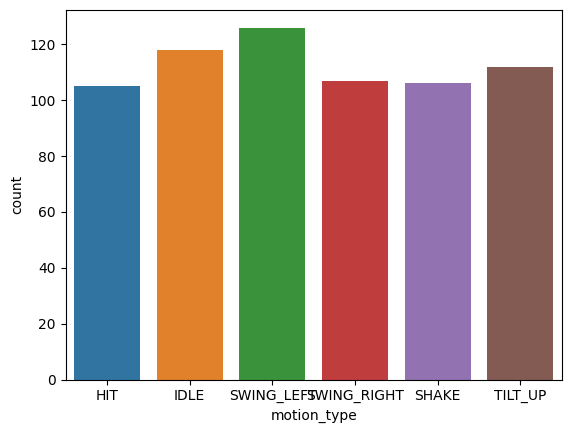

In [93]:
sns.countplot(df_train, x="motion_type", hue="motion_type")

In [94]:
len(df_train)

674

<Axes: xlabel='motion_type', ylabel='count'>

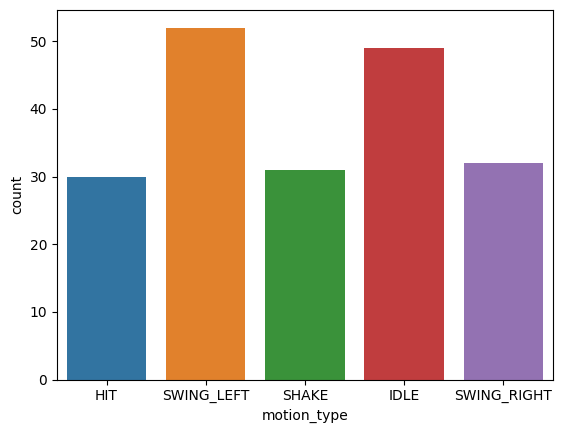

In [95]:
sns.countplot(df_test, x="motion_type", hue="motion_type")

In [96]:
len(df_test)

194

## Get X and y

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
def get_X_and_y(df: pd.DataFrame) -> tuple[np.array, np.array]:
    X_df = df.drop(columns=["motion_type"])
    y = df["motion_type"].values
    
    n_timesteps = 30
    channels = []
    match CHANNEL_CONFIG:
        case "accel":
            channels = ["accel_x", "accel_y", "accel_z"]
        case "gyro":
            channels = ["gyro_x", "gyro_y", "gyro_z"]
        case "mag":
            channels = ["mag_x", "mag_y", "mag_z"]
        case "ahrs":
            channels = ["ahrs_x", "ahrs_y", "ahrs_z", "ahrs_w"]
        case "g-a":
            channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z"]
        case "g-m":
            channels = ["gyro_x", "gyro_y", "gyro_z", "mag_x", "mag_y", "mag_z"]
        case "a-m":
            channels = ["accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
        case "g-a-m":
            channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
        case _:
            channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z", "ahrs_x", "ahrs_y", "ahrs_z", "ahrs_w"]
    n_channels = len(channels)

    X = np.zeros((len(df), n_channels, n_timesteps))

    for t in range(n_timesteps):
        for c, channel in enumerate(channels):
            col_name = f"{channel}_{t}"
    
            X[:, c, t] = X_df[col_name].values
            
    return X, y

In [99]:
X_train, y_train = get_X_and_y(df_train)
X_test, y_test = get_X_and_y(df_test)

In [100]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [101]:
le.classes_

array(['HIT', 'IDLE', 'SHAKE', 'SWING_LEFT', 'SWING_RIGHT', 'TILT_UP'],
      dtype=object)

In [102]:
from sktime.classification.kernel_based import RocketClassifier
from sklearn.linear_model import RidgeClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.classification.deep_learning import InceptionTimeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [103]:
clf_minirocket = RocketClassifier(num_kernels=500) 

In [104]:
# clf_minirocket = KNeighborsTimeSeriesClassifier(n_neighbors=1)

In [105]:
clf_minirocket.fit(X_train, y_train)

RocketClassifier(num_kernels=500)

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [107]:
y_pred_train = clf_minirocket.predict(X_train)

In [108]:
print(accuracy_score(y_train, y_pred_train))
print(precision_score(y_train, y_pred_train, average="weighted"))
print(recall_score(y_train, y_pred_train, average="weighted"))
print(f1_score(y_train, y_pred_train, average="weighted"))

1.0
1.0
1.0
1.0


In [109]:
y_pred_test = clf_minirocket.predict(X_test)

In [110]:
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test, average="weighted", zero_division=0))
print(recall_score(y_test, y_pred_test, average="weighted", zero_division=0))
print(f1_score(y_test, y_pred_test, average="weighted", zero_division=0))

0.9536082474226805
0.9601425000180105
0.9536082474226805
0.9554652194618893


In [111]:
print(confusion_matrix(y_test, y_pred_test))

[[29  0  0  0  1  0]
 [ 1 47  0  0  0  1]
 [ 0  0 31  0  0  0]
 [ 0  0  0 52  0  0]
 [ 0  6  0  0 26  0]
 [ 0  0  0  0  0  0]]


In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.89      0.96      0.92        49
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        52
           4       0.96      0.81      0.88        32
           5       0.00      0.00      0.00         0

    accuracy                           0.95       194
   macro avg       0.80      0.79      0.79       194
weighted avg       0.96      0.95      0.96       194



c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_d

In [114]:
from skl2onnx import to_onnx

In [115]:
from joblib import dump


dump(clf_minirocket, "clf_minirocket.joblib")

['clf_minirocket.joblib']

In [116]:
X_train.shape

(674, 6, 30)

In [117]:
clf_minirocket.predict(X_train[0:1])

array([0])

In [118]:
print(repr(X_train[0:1]))

array([[[ -5.04831266,  -4.84989977,  -4.84989977,  -4.32671261,
          -4.32671261,  -4.32671261,  -4.19154978,  -4.19154978,
          -4.19154978,  -4.68435001,  -4.68435001,  -5.19337511,
          -4.73893738,  -4.73893738,  -4.73893738,   0.2019875 ,
           0.2019875 ,   5.82408762,   5.82408762,   5.82408762,
          10.88339996,  10.88339996,  14.4541378 ,  11.82376289,
          11.82376289,  11.82376289,   8.00415039,   8.00415039,
           6.1406126 ,   6.1406126 ],
        [  0.54422498,   0.211475  ,   0.211475  ,   0.0996875 ,
           0.0996875 ,   0.0996875 ,   0.1186625 ,   0.1186625 ,
           0.1186625 ,   0.30868751,   0.30868751,   0.63098752,
           1.089275  ,   1.089275  ,   1.089275  ,   0.82568747,
           0.82568747,   0.2014375 ,   0.2014375 ,   0.2014375 ,
           1.13863754,   1.13863754,   2.66763759,   4.09736252,
           4.09736252,   4.09736252,   5.74818754,   5.74818754,
           4.27391243,   4.27391243],
        [  2.1

In [119]:
print(repr(y_train[0]))

np.int64(0)
